<a href="https://colab.research.google.com/github/KaueAbbe/Challenge_Data_Science1_Alura/blob/main/Semana%203/DSModelo_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red' size = 10 > Modelo de Machine Learning </font>
#### **Autor:** Kaue Hermann Abbehausen
#### **Linkedin:** https://www.linkedin.com/in/kaue-abbehausen-5b1922165/
## <font color = 'green'> Contextualizando</font>
Eu atuo como cientista de dados pela operadora de telecomunicações Alura Voz. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de se reduzir a Taxa de Evasão de Clientes, conhecido como **Churn Rate**. Basicamente, o **Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.**

Eu sugeri, como passo inicial, a identificação de clientes que teriam uma maior chance de deixar a empresa. Para isso, expliquei que é interessante investigar algumas características de clientes ou dos planos de clientes para tentar CLASSIFICAR estas pessoas como potenciais candidatas a deixar a empresa ou não.

Assim, solicitei o conjunto de dados para começar a explorar, tratar e modelar a partir de agora. Em seguida, o foco será na otimização de cada um dos modelos com a finalidade de obter o melhor resultado para a tomada de decisão da Alura Voz.

* **Os dados foram retirados de uma API e podem ser encontrado no link abaixo:**

https://github.com/sthemonica/alura-voz/blob/main/Dados/Telco-Customer-Churn.json

* **Os dados foram tratados no arquivo Semana 1 e são encontrados no link abaixo:**

https://github.com/KaueAbbe/Challenge_Data_Science1_Alura  
* Versão Raw

https://raw.githubusercontent.com/KaueAbbe/Challenge_Data_Science1_Alura/main/Telco-Customer-Churn-Corrigido.json


* **A análise exploratório dos dados foi feita na semana 2.E agora é o momento de criar um modelo de machine learning em que é possível prever quais os clientes que podem vir a evadir da empresa AluraVoz**

## **Resultados da Análise exploratória**

Durante a análise exploratória foram encontrados variáveis que apresentam diferença entre os grupos que evadiram e que não evadiram. Para as variáveis do tipo qualitativas (categóricas) temos:

* Idoso,
 Parceiro,
 Dependencia,
 Tipo_contrato,
 Fatura_online,
 Metodo_pagamento,
 Servico_internet,
 Assinatura_tv,
 Assinatura_filme

 Desta lista de variáveis categóricas apenas Idoso, Parceiro, dependencia, Fatura_online, servico_internet, assinatura_tv e assinatura_filme são de duas categorias (sim ou não).

In [7]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import numpy as np

In [8]:
dados = pd.read_json('https://raw.githubusercontent.com/KaueAbbe/Challenge_Data_Science1_Alura/main/Telco-Customer-Churn-Corrigido.json')
dados[['Evadiu','Idoso',
 'Parceiro',
 'Dependencia',
 'Tipo_contrato',
 'Fatura_online',
 'Metodo_pagamento',
 'Servico_internet',
 'Assinatura_tv',
 'Assinatura_filme']].head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Tipo_contrato,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme
0,Nao,Nao,Sim,Sim,Anual,Sim,Cheque por Email,DSL,Sim,Nao
1,Nao,Nao,Nao,Nao,Mes a Mes,Nao,Cheque por Email,DSL,Nao,Sim
2,Sim,Nao,Nao,Nao,Mes a Mes,Sim,Cheque Eletronico,Fibra optica,Nao,Nao
3,Sim,Sim,Sim,Nao,Mes a Mes,Sim,Cheque Eletronico,Fibra optica,Sim,Sim
4,Sim,Sim,Sim,Nao,Mes a Mes,Sim,Cheque por Email,Fibra optica,Sim,Nao
5,Nao,Nao,Nao,Sim,Mes a Mes,Sim,Cartao Credito (automatico),DSL,Sim,Sim
6,Nao,Sim,Sim,Nao,Bianual,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim
7,Nao,Nao,Sim,Nao,Bianual,Sim,Cartao Credito (automatico),Fibra optica,Nao,Nao
8,Nao,Sim,Nao,Nao,Mes a Mes,Sim,Cheque Eletronico,DSL,Nao,Nao
9,Nao,Nao,Sim,Sim,Bianual,Sim,Cheque por Email,DSL,Sim,Sim


In [9]:
dados.groupby('Evadiu').count()['Genero']

Evadiu
Nao    5174
Sim    1869
Name: Genero, dtype: int64

In [10]:
grupo_nao = dados.query('Evadiu == "Nao"').sample(n = 1890, random_state = 10)
grupo_nao

,IDcliente,Evadiu,Genero,Idoso,Parceiro,Dependencia,Meses_de_contrato,Servico_celular,linhas_multiplas,Tipo_contrato,...,Gasto_mensal,Gasto_total,Servico_internet,Seguranca_online,Backup_online,Protecao_de_aparelho,Suporte_tecnico,Assinatura_tv,Assinatura_filme,Gasto_diario
1597,2324-EFHVG,Nao,Homem,Nao,Nao,Nao,64,Sim,Sim,Bianual,...,104.40,6692.65,Fibra optica,Nao,Sim,Sim,Nao,Sim,Sim,3.480000
4287,6035-RIIOM,Nao,Mulher,Nao,Nao,Nao,54,Sim,Sim,Bianual,...,97.20,5129.45,Fibra optica,Nao,Sim,Nao,Nao,Sim,Sim,3.240000
778,1134-YWTYF,Nao,Homem,Nao,Sim,Nao,27,Sim,Nao,Mes a Mes,...,53.80,1389.85,DSL,Nao,Sim,Nao,Sim,Nao,Nao,1.793333
1037,1498-NHTLT,Nao,Homem,Nao,Sim,Sim,59,Sim,Nao,Bianual,...,86.75,5186.00,DSL,Sim,Sim,Sim,Sim,Sim,Sim,2.891667
2747,3908-MKIMJ,Nao,Homem,Sim,Sim,Nao,68,Nao,Sem servico celular,Bianual,...,41.95,2965.75,DSL,Sim,Sim,Sim,Nao,Nao,Nao,1.398333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,9770-KXGQU,Nao,Mulher,Nao,Nao,Nao,53,Sim,Sim,Anual,...,98.60,5311.85,Fibra optica,Sim,Sim,Sim,Nao,Sim,Nao,3.286667
1703,2480-JZOSN,Nao,Mulher,Nao,Sim,Nao,1,Sim,Nao,Mes a Mes,...,20.65,20.65,Nao,Sem servico internet,Sem servico internet,Sem servico internet,Sem servico internet,Sem servico internet,Sem servico internet,0.688333
1086,1580-BMCMR,Nao,Homem,Sim,Nao,Nao,19,Sim,Nao,Mes a Mes,...,87.30,1637.30,Fibra optica,Sim,Nao,Nao,Nao,Nao,Sim,2.910000
6715,9537-VHDTA,Nao,Mulher,Nao,Nao,Sim,1,Sim,Nao,Mes a Mes,...,51.20,51.20,DSL,Sim,Nao,Nao,Nao,Nao,Nao,1.706667


In [11]:
grupo_sim = dados.query('Evadiu == "Sim"')
grupo_sim

,IDcliente,Evadiu,Genero,Idoso,Parceiro,Dependencia,Meses_de_contrato,Servico_celular,linhas_multiplas,Tipo_contrato,...,Gasto_mensal,Gasto_total,Servico_internet,Seguranca_online,Backup_online,Protecao_de_aparelho,Suporte_tecnico,Assinatura_tv,Assinatura_filme,Gasto_diario
2,0004-TLHLJ,Sim,Homem,Nao,Nao,Nao,4,Sim,Nao,Mes a Mes,...,73.90,280.85,Fibra optica,Nao,Nao,Sim,Nao,Nao,Nao,2.463333
3,0011-IGKFF,Sim,Homem,Sim,Sim,Nao,13,Sim,Nao,Mes a Mes,...,98.00,1237.85,Fibra optica,Nao,Sim,Sim,Nao,Sim,Sim,3.266667
4,0013-EXCHZ,Sim,Mulher,Sim,Sim,Nao,3,Sim,Nao,Mes a Mes,...,83.90,267.40,Fibra optica,Nao,Nao,Nao,Sim,Sim,Nao,2.796667
18,0022-TCJCI,Sim,Homem,Sim,Nao,Nao,45,Sim,Nao,Anual,...,62.70,2791.50,DSL,Sim,Nao,Sim,Nao,Nao,Sim,2.090000
19,0023-HGHWL,Sim,Homem,Sim,Nao,Nao,1,Nao,Sem servico celular,Mes a Mes,...,25.10,25.10,DSL,Nao,Nao,Nao,Nao,Nao,Nao,0.836667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9961-JBNMK,Sim,Homem,Sim,Nao,Nao,21,Sim,Nao,Mes a Mes,...,96.80,2030.30,Fibra optica,Nao,Nao,Sim,Nao,Sim,Sim,3.226667
7023,9965-YOKZB,Sim,Homem,Sim,Nao,Nao,9,Sim,Sim,Mes a Mes,...,83.85,790.15,Fibra optica,Nao,Nao,Nao,Nao,Nao,Sim,2.795000
7036,9985-MWVIX,Sim,Mulher,Nao,Nao,Nao,1,Sim,Nao,Mes a Mes,...,70.15,70.15,Fibra optica,Nao,Nao,Nao,Nao,Nao,Nao,2.338333
7037,9986-BONCE,Sim,Mulher,Nao,Nao,Nao,4,Sim,Nao,Mes a Mes,...,20.95,85.50,Nao,Sem servico internet,Sem servico internet,Sem servico internet,Sem servico internet,Sem servico internet,Sem servico internet,0.698333


In [12]:
dados_balanceado = pd.concat([grupo_nao, grupo_sim],axis = 0)
dados_balanceado

,IDcliente,Evadiu,Genero,Idoso,Parceiro,Dependencia,Meses_de_contrato,Servico_celular,linhas_multiplas,Tipo_contrato,...,Gasto_mensal,Gasto_total,Servico_internet,Seguranca_online,Backup_online,Protecao_de_aparelho,Suporte_tecnico,Assinatura_tv,Assinatura_filme,Gasto_diario
1597,2324-EFHVG,Nao,Homem,Nao,Nao,Nao,64,Sim,Sim,Bianual,...,104.40,6692.65,Fibra optica,Nao,Sim,Sim,Nao,Sim,Sim,3.480000
4287,6035-RIIOM,Nao,Mulher,Nao,Nao,Nao,54,Sim,Sim,Bianual,...,97.20,5129.45,Fibra optica,Nao,Sim,Nao,Nao,Sim,Sim,3.240000
778,1134-YWTYF,Nao,Homem,Nao,Sim,Nao,27,Sim,Nao,Mes a Mes,...,53.80,1389.85,DSL,Nao,Sim,Nao,Sim,Nao,Nao,1.793333
1037,1498-NHTLT,Nao,Homem,Nao,Sim,Sim,59,Sim,Nao,Bianual,...,86.75,5186.00,DSL,Sim,Sim,Sim,Sim,Sim,Sim,2.891667
2747,3908-MKIMJ,Nao,Homem,Sim,Sim,Nao,68,Nao,Sem servico celular,Bianual,...,41.95,2965.75,DSL,Sim,Sim,Sim,Nao,Nao,Nao,1.398333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9961-JBNMK,Sim,Homem,Sim,Nao,Nao,21,Sim,Nao,Mes a Mes,...,96.80,2030.30,Fibra optica,Nao,Nao,Sim,Nao,Sim,Sim,3.226667
7023,9965-YOKZB,Sim,Homem,Sim,Nao,Nao,9,Sim,Sim,Mes a Mes,...,83.85,790.15,Fibra optica,Nao,Nao,Nao,Nao,Nao,Sim,2.795000
7036,9985-MWVIX,Sim,Mulher,Nao,Nao,Nao,1,Sim,Nao,Mes a Mes,...,70.15,70.15,Fibra optica,Nao,Nao,Nao,Nao,Nao,Nao,2.338333
7037,9986-BONCE,Sim,Mulher,Nao,Nao,Nao,4,Sim,Nao,Mes a Mes,...,20.95,85.50,Nao,Sem servico internet,Sem servico internet,Sem servico internet,Sem servico internet,Sem servico internet,Sem servico internet,0.698333


## 1º Modelo: **Modelo de Classificação**

Modelo leva em consideração os sims e nãos dos dados de variáveis categóricas. AS variáveis que tem mais de uma alternativa de escolha serão transformados em colunas de sim e não. 
Não -> 0
Sim -> 1 

In [13]:
variaveis_cat = dados_balanceado[['Evadiu','Idoso',
 'Parceiro',
 'Dependencia',
 'Tipo_contrato',
 'Fatura_online',
 'Metodo_pagamento',
 'Servico_internet',
 'Assinatura_tv',
 'Assinatura_filme']].copy()
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Tipo_contrato,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme
1597,Nao,Nao,Nao,Nao,Bianual,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim
4287,Nao,Nao,Nao,Nao,Bianual,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim
778,Nao,Nao,Sim,Nao,Mes a Mes,Sim,Cheque Eletronico,DSL,Nao,Nao
1037,Nao,Nao,Sim,Sim,Bianual,Sim,Cheque Eletronico,DSL,Sim,Sim
2747,Nao,Sim,Sim,Nao,Bianual,Sim,Cheque Eletronico,DSL,Nao,Nao
2491,Nao,Nao,Sim,Nao,Mes a Mes,Nao,Transferencia Bancaria (automatico),DSL,Nao,Nao
6036,Nao,Nao,Sim,Nao,Anual,Sim,Cartao Credito (automatico),DSL,Nao,Sim
1617,Nao,Nao,Sim,Sim,Mes a Mes,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim
2080,Nao,Nao,Nao,Nao,Bianual,Nao,Cheque por Email,DSL,Sim,Sim
6701,Nao,Nao,Nao,Nao,Mes a Mes,Sim,Transferencia Bancaria (automatico),DSL,Sim,Nao


### 1. Alterando Tipo_contrato

In [14]:
anual = variaveis_cat['Tipo_contrato'].isin(['Anual'])
lista_anual = []
for valor in anual.values:
  if valor == True:
    lista_anual.append(1)
  else:
    lista_anual.append(0)


In [15]:
variaveis_cat['Contrato_anual'] = lista_anual
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Tipo_contrato,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual
1597,Nao,Nao,Nao,Nao,Bianual,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0
4287,Nao,Nao,Nao,Nao,Bianual,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0
778,Nao,Nao,Sim,Nao,Mes a Mes,Sim,Cheque Eletronico,DSL,Nao,Nao,0
1037,Nao,Nao,Sim,Sim,Bianual,Sim,Cheque Eletronico,DSL,Sim,Sim,0
2747,Nao,Sim,Sim,Nao,Bianual,Sim,Cheque Eletronico,DSL,Nao,Nao,0
2491,Nao,Nao,Sim,Nao,Mes a Mes,Nao,Transferencia Bancaria (automatico),DSL,Nao,Nao,0
6036,Nao,Nao,Sim,Nao,Anual,Sim,Cartao Credito (automatico),DSL,Nao,Sim,1
1617,Nao,Nao,Sim,Sim,Mes a Mes,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0
2080,Nao,Nao,Nao,Nao,Bianual,Nao,Cheque por Email,DSL,Sim,Sim,0
6701,Nao,Nao,Nao,Nao,Mes a Mes,Sim,Transferencia Bancaria (automatico),DSL,Sim,Nao,0


In [16]:
mes = variaveis_cat['Tipo_contrato'].isin(['Mes a Mes'])
lista_mes = []
for valor in mes.values:
  if valor == True:
    lista_mes.append(1)
  else:
    lista_mes.append(0)
variaveis_cat['Contrato_mes'] = lista_mes
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Tipo_contrato,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes
1597,Nao,Nao,Nao,Nao,Bianual,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0
4287,Nao,Nao,Nao,Nao,Bianual,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0
778,Nao,Nao,Sim,Nao,Mes a Mes,Sim,Cheque Eletronico,DSL,Nao,Nao,0,1
1037,Nao,Nao,Sim,Sim,Bianual,Sim,Cheque Eletronico,DSL,Sim,Sim,0,0
2747,Nao,Sim,Sim,Nao,Bianual,Sim,Cheque Eletronico,DSL,Nao,Nao,0,0
2491,Nao,Nao,Sim,Nao,Mes a Mes,Nao,Transferencia Bancaria (automatico),DSL,Nao,Nao,0,1
6036,Nao,Nao,Sim,Nao,Anual,Sim,Cartao Credito (automatico),DSL,Nao,Sim,1,0
1617,Nao,Nao,Sim,Sim,Mes a Mes,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,1
2080,Nao,Nao,Nao,Nao,Bianual,Nao,Cheque por Email,DSL,Sim,Sim,0,0
6701,Nao,Nao,Nao,Nao,Mes a Mes,Sim,Transferencia Bancaria (automatico),DSL,Sim,Nao,0,1


In [17]:
bianual = variaveis_cat['Tipo_contrato'].isin(['Bianual'])
lista_bianual = []
for valor in bianual.values:
  if valor == True:
    lista_bianual.append(1)
  else:
    lista_bianual.append(0)
variaveis_cat['Contrato_bianual'] = lista_bianual
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Tipo_contrato,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual
1597,Nao,Nao,Nao,Nao,Bianual,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1
4287,Nao,Nao,Nao,Nao,Bianual,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1
778,Nao,Nao,Sim,Nao,Mes a Mes,Sim,Cheque Eletronico,DSL,Nao,Nao,0,1,0
1037,Nao,Nao,Sim,Sim,Bianual,Sim,Cheque Eletronico,DSL,Sim,Sim,0,0,1
2747,Nao,Sim,Sim,Nao,Bianual,Sim,Cheque Eletronico,DSL,Nao,Nao,0,0,1
2491,Nao,Nao,Sim,Nao,Mes a Mes,Nao,Transferencia Bancaria (automatico),DSL,Nao,Nao,0,1,0
6036,Nao,Nao,Sim,Nao,Anual,Sim,Cartao Credito (automatico),DSL,Nao,Sim,1,0,0
1617,Nao,Nao,Sim,Sim,Mes a Mes,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,1,0
2080,Nao,Nao,Nao,Nao,Bianual,Nao,Cheque por Email,DSL,Sim,Sim,0,0,1
6701,Nao,Nao,Nao,Nao,Mes a Mes,Sim,Transferencia Bancaria (automatico),DSL,Sim,Nao,0,1,0


In [18]:
variaveis_cat.drop(['Tipo_contrato'], axis = 1, inplace = True)
variaveis_cat.head()

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual
1597,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1
4287,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1
778,Nao,Nao,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,1,0
1037,Nao,Nao,Sim,Sim,Sim,Cheque Eletronico,DSL,Sim,Sim,0,0,1
2747,Nao,Sim,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,0,1


### 2. Alterando Metodo_pagamento

In [19]:
variaveis_cat['Metodo_pagamento'].unique()

array(['Transferencia Bancaria (automatico)', 'Cheque Eletronico',
       'Cartao Credito (automatico)', 'Cheque por Email'], dtype=object)

In [20]:
lista_ce = []
for valor in variaveis_cat['Metodo_pagamento'].isin(['Cheque por Email']):
  if valor == True:
    lista_ce.append(1)
  else:
    lista_ce.append(0)
variaveis_cat['Pagamento_Cheque_Email'] = lista_ce
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email
1597,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1,0
4287,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1,0
778,Nao,Nao,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,1,0,0
1037,Nao,Nao,Sim,Sim,Sim,Cheque Eletronico,DSL,Sim,Sim,0,0,1,0
2747,Nao,Sim,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,0,1,0
2491,Nao,Nao,Sim,Nao,Nao,Transferencia Bancaria (automatico),DSL,Nao,Nao,0,1,0,0
6036,Nao,Nao,Sim,Nao,Sim,Cartao Credito (automatico),DSL,Nao,Sim,1,0,0,0
1617,Nao,Nao,Sim,Sim,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,1,0,0
2080,Nao,Nao,Nao,Nao,Nao,Cheque por Email,DSL,Sim,Sim,0,0,1,1
6701,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),DSL,Sim,Nao,0,1,0,0


In [21]:
lista_cel = []
for valor in variaveis_cat['Metodo_pagamento'].isin(['Cheque Eletronico']):
  if valor == True:
    lista_cel.append(1)
  else:
    lista_cel.append(0)
variaveis_cat['Pagamento_Cheque_Eletrico'] = lista_cel
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico
1597,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1,0,0
4287,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1,0,0
778,Nao,Nao,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,1,0,0,1
1037,Nao,Nao,Sim,Sim,Sim,Cheque Eletronico,DSL,Sim,Sim,0,0,1,0,1
2747,Nao,Sim,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,0,1,0,1
2491,Nao,Nao,Sim,Nao,Nao,Transferencia Bancaria (automatico),DSL,Nao,Nao,0,1,0,0,0
6036,Nao,Nao,Sim,Nao,Sim,Cartao Credito (automatico),DSL,Nao,Sim,1,0,0,0,0
1617,Nao,Nao,Sim,Sim,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,1,0,0,0
2080,Nao,Nao,Nao,Nao,Nao,Cheque por Email,DSL,Sim,Sim,0,0,1,1,0
6701,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),DSL,Sim,Nao,0,1,0,0,0


In [22]:
lista_cartao = []
for valor in variaveis_cat['Metodo_pagamento'].isin(['Cartao Credito (automatico)']):
  if valor == True:
    lista_cartao.append(1)
  else:
    lista_cartao.append(0)
variaveis_cat['Pagamento_Cartao_credito'] = lista_cartao
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito
1597,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1,0,0,0
4287,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1,0,0,0
778,Nao,Nao,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,1,0,0,1,0
1037,Nao,Nao,Sim,Sim,Sim,Cheque Eletronico,DSL,Sim,Sim,0,0,1,0,1,0
2747,Nao,Sim,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,0,1,0,1,0
2491,Nao,Nao,Sim,Nao,Nao,Transferencia Bancaria (automatico),DSL,Nao,Nao,0,1,0,0,0,0
6036,Nao,Nao,Sim,Nao,Sim,Cartao Credito (automatico),DSL,Nao,Sim,1,0,0,0,0,1
1617,Nao,Nao,Sim,Sim,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,1,0,0,0,0
2080,Nao,Nao,Nao,Nao,Nao,Cheque por Email,DSL,Sim,Sim,0,0,1,1,0,0
6701,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),DSL,Sim,Nao,0,1,0,0,0,0


In [23]:
lista_trans = []
for valor in variaveis_cat['Metodo_pagamento'].isin(['Transferencia Bancaria (automatico)']):
  if valor == True:
    lista_trans.append(1)
  else:
    lista_trans.append(0)
variaveis_cat['Pagamento_Transferencia'] = lista_trans
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Metodo_pagamento,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia
1597,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1,0,0,0,1
4287,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,0,1,0,0,0,1
778,Nao,Nao,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,1,0,0,1,0,0
1037,Nao,Nao,Sim,Sim,Sim,Cheque Eletronico,DSL,Sim,Sim,0,0,1,0,1,0,0
2747,Nao,Sim,Sim,Nao,Sim,Cheque Eletronico,DSL,Nao,Nao,0,0,1,0,1,0,0
2491,Nao,Nao,Sim,Nao,Nao,Transferencia Bancaria (automatico),DSL,Nao,Nao,0,1,0,0,0,0,1
6036,Nao,Nao,Sim,Nao,Sim,Cartao Credito (automatico),DSL,Nao,Sim,1,0,0,0,0,1,0
1617,Nao,Nao,Sim,Sim,Sim,Transferencia Bancaria (automatico),Fibra optica,Sim,Sim,0,1,0,0,0,0,1
2080,Nao,Nao,Nao,Nao,Nao,Cheque por Email,DSL,Sim,Sim,0,0,1,1,0,0,0
6701,Nao,Nao,Nao,Nao,Sim,Transferencia Bancaria (automatico),DSL,Sim,Nao,0,1,0,0,0,0,1


In [24]:
variaveis_cat.drop(['Metodo_pagamento'], axis = 1, inplace = True)
variaveis_cat.head()

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia
1597,Nao,Nao,Nao,Nao,Sim,Fibra optica,Sim,Sim,0,0,1,0,0,0,1
4287,Nao,Nao,Nao,Nao,Sim,Fibra optica,Sim,Sim,0,0,1,0,0,0,1
778,Nao,Nao,Sim,Nao,Sim,DSL,Nao,Nao,0,1,0,0,1,0,0
1037,Nao,Nao,Sim,Sim,Sim,DSL,Sim,Sim,0,0,1,0,1,0,0
2747,Nao,Sim,Sim,Nao,Sim,DSL,Nao,Nao,0,0,1,0,1,0,0


### 3. Alterando Servico_internet

In [25]:
variaveis_cat['Servico_internet'].unique()

array(['Fibra optica', 'DSL', 'Nao'], dtype=object)

In [26]:
lista_DSL = []
for valor in variaveis_cat['Servico_internet'].isin(['DSL']):
  if valor == True:
    lista_DSL.append(1)
  else:
    lista_DSL.append(0)
variaveis_cat['Internet_DSL'] = lista_DSL
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL
1597,Nao,Nao,Nao,Nao,Sim,Fibra optica,Sim,Sim,0,0,1,0,0,0,1,0
4287,Nao,Nao,Nao,Nao,Sim,Fibra optica,Sim,Sim,0,0,1,0,0,0,1,0
778,Nao,Nao,Sim,Nao,Sim,DSL,Nao,Nao,0,1,0,0,1,0,0,1
1037,Nao,Nao,Sim,Sim,Sim,DSL,Sim,Sim,0,0,1,0,1,0,0,1
2747,Nao,Sim,Sim,Nao,Sim,DSL,Nao,Nao,0,0,1,0,1,0,0,1
2491,Nao,Nao,Sim,Nao,Nao,DSL,Nao,Nao,0,1,0,0,0,0,1,1
6036,Nao,Nao,Sim,Nao,Sim,DSL,Nao,Sim,1,0,0,0,0,1,0,1
1617,Nao,Nao,Sim,Sim,Sim,Fibra optica,Sim,Sim,0,1,0,0,0,0,1,0
2080,Nao,Nao,Nao,Nao,Nao,DSL,Sim,Sim,0,0,1,1,0,0,0,1
6701,Nao,Nao,Nao,Nao,Sim,DSL,Sim,Nao,0,1,0,0,0,0,1,1


In [27]:
lista_fibra = []
for valor in variaveis_cat['Servico_internet'].isin(['Fibra optica']):
  if valor == True:
    lista_fibra.append(1)
  else:
    lista_fibra.append(0)
variaveis_cat['Internet_FibraOptica'] = lista_fibra
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica
1597,Nao,Nao,Nao,Nao,Sim,Fibra optica,Sim,Sim,0,0,1,0,0,0,1,0,1
4287,Nao,Nao,Nao,Nao,Sim,Fibra optica,Sim,Sim,0,0,1,0,0,0,1,0,1
778,Nao,Nao,Sim,Nao,Sim,DSL,Nao,Nao,0,1,0,0,1,0,0,1,0
1037,Nao,Nao,Sim,Sim,Sim,DSL,Sim,Sim,0,0,1,0,1,0,0,1,0
2747,Nao,Sim,Sim,Nao,Sim,DSL,Nao,Nao,0,0,1,0,1,0,0,1,0
2491,Nao,Nao,Sim,Nao,Nao,DSL,Nao,Nao,0,1,0,0,0,0,1,1,0
6036,Nao,Nao,Sim,Nao,Sim,DSL,Nao,Sim,1,0,0,0,0,1,0,1,0
1617,Nao,Nao,Sim,Sim,Sim,Fibra optica,Sim,Sim,0,1,0,0,0,0,1,0,1
2080,Nao,Nao,Nao,Nao,Nao,DSL,Sim,Sim,0,0,1,1,0,0,0,1,0
6701,Nao,Nao,Nao,Nao,Sim,DSL,Sim,Nao,0,1,0,0,0,0,1,1,0


In [28]:
lista_nao = []
for valor in variaveis_cat['Servico_internet'].isin(['Nao']):
  if valor == True:
    lista_nao.append(1)
  else:
    lista_nao.append(0)
variaveis_cat['Internet_SemInternet'] = lista_nao
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Servico_internet,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet
1597,Nao,Nao,Nao,Nao,Sim,Fibra optica,Sim,Sim,0,0,1,0,0,0,1,0,1,0
4287,Nao,Nao,Nao,Nao,Sim,Fibra optica,Sim,Sim,0,0,1,0,0,0,1,0,1,0
778,Nao,Nao,Sim,Nao,Sim,DSL,Nao,Nao,0,1,0,0,1,0,0,1,0,0
1037,Nao,Nao,Sim,Sim,Sim,DSL,Sim,Sim,0,0,1,0,1,0,0,1,0,0
2747,Nao,Sim,Sim,Nao,Sim,DSL,Nao,Nao,0,0,1,0,1,0,0,1,0,0
2491,Nao,Nao,Sim,Nao,Nao,DSL,Nao,Nao,0,1,0,0,0,0,1,1,0,0
6036,Nao,Nao,Sim,Nao,Sim,DSL,Nao,Sim,1,0,0,0,0,1,0,1,0,0
1617,Nao,Nao,Sim,Sim,Sim,Fibra optica,Sim,Sim,0,1,0,0,0,0,1,0,1,0
2080,Nao,Nao,Nao,Nao,Nao,DSL,Sim,Sim,0,0,1,1,0,0,0,1,0,0
6701,Nao,Nao,Nao,Nao,Sim,DSL,Sim,Nao,0,1,0,0,0,0,1,1,0,0


In [29]:
variaveis_cat.drop(['Servico_internet'], axis = 1, inplace = True)
variaveis_cat.head()

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet
1597,Nao,Nao,Nao,Nao,Sim,Sim,Sim,0,0,1,0,0,0,1,0,1,0
4287,Nao,Nao,Nao,Nao,Sim,Sim,Sim,0,0,1,0,0,0,1,0,1,0
778,Nao,Nao,Sim,Nao,Sim,Nao,Nao,0,1,0,0,1,0,0,1,0,0
1037,Nao,Nao,Sim,Sim,Sim,Sim,Sim,0,0,1,0,1,0,0,1,0,0
2747,Nao,Sim,Sim,Nao,Sim,Nao,Nao,0,0,1,0,1,0,0,1,0,0


### 4. Alterando as variáveis Assinatura.
Estas apresentam 3 valores, sendo um deles repetido na variáveis Sem internet

In [30]:
variaveis_cat['Assinatura_tv'].unique()

array(['Sim', 'Nao', 'Sem servico internet'], dtype=object)

In [31]:
lista_Assnao = []
for valor in variaveis_cat['Assinatura_tv'].isin(['Sim']):
  if valor == True:
    lista_Assnao.append(1)
  else:
    lista_Assnao.append(0)
variaveis_cat['Tv'] = lista_Assnao
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Assinatura_tv,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv
1597,Nao,Nao,Nao,Nao,Sim,Sim,Sim,0,0,1,0,0,0,1,0,1,0,1
4287,Nao,Nao,Nao,Nao,Sim,Sim,Sim,0,0,1,0,0,0,1,0,1,0,1
778,Nao,Nao,Sim,Nao,Sim,Nao,Nao,0,1,0,0,1,0,0,1,0,0,0
1037,Nao,Nao,Sim,Sim,Sim,Sim,Sim,0,0,1,0,1,0,0,1,0,0,1
2747,Nao,Sim,Sim,Nao,Sim,Nao,Nao,0,0,1,0,1,0,0,1,0,0,0
2491,Nao,Nao,Sim,Nao,Nao,Nao,Nao,0,1,0,0,0,0,1,1,0,0,0
6036,Nao,Nao,Sim,Nao,Sim,Nao,Sim,1,0,0,0,0,1,0,1,0,0,0
1617,Nao,Nao,Sim,Sim,Sim,Sim,Sim,0,1,0,0,0,0,1,0,1,0,1
2080,Nao,Nao,Nao,Nao,Nao,Sim,Sim,0,0,1,1,0,0,0,1,0,0,1
6701,Nao,Nao,Nao,Nao,Sim,Sim,Nao,0,1,0,0,0,0,1,1,0,0,1


In [32]:
variaveis_cat.drop(['Assinatura_tv'], axis = 1, inplace = True)
variaveis_cat.head()

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv
1597,Nao,Nao,Nao,Nao,Sim,Sim,0,0,1,0,0,0,1,0,1,0,1
4287,Nao,Nao,Nao,Nao,Sim,Sim,0,0,1,0,0,0,1,0,1,0,1
778,Nao,Nao,Sim,Nao,Sim,Nao,0,1,0,0,1,0,0,1,0,0,0
1037,Nao,Nao,Sim,Sim,Sim,Sim,0,0,1,0,1,0,0,1,0,0,1
2747,Nao,Sim,Sim,Nao,Sim,Nao,0,0,1,0,1,0,0,1,0,0,0


In [33]:
lista_Ass = []
for valor in variaveis_cat['Assinatura_filme'].isin(['Sim']):
  if valor == True:
    lista_Ass.append(1)
  else:
    lista_Ass.append(0)
variaveis_cat['Filme_sim'] = lista_Ass
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Assinatura_filme,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim
1597,Nao,Nao,Nao,Nao,Sim,Sim,0,0,1,0,0,0,1,0,1,0,1,1
4287,Nao,Nao,Nao,Nao,Sim,Sim,0,0,1,0,0,0,1,0,1,0,1,1
778,Nao,Nao,Sim,Nao,Sim,Nao,0,1,0,0,1,0,0,1,0,0,0,0
1037,Nao,Nao,Sim,Sim,Sim,Sim,0,0,1,0,1,0,0,1,0,0,1,1
2747,Nao,Sim,Sim,Nao,Sim,Nao,0,0,1,0,1,0,0,1,0,0,0,0
2491,Nao,Nao,Sim,Nao,Nao,Nao,0,1,0,0,0,0,1,1,0,0,0,0
6036,Nao,Nao,Sim,Nao,Sim,Sim,1,0,0,0,0,1,0,1,0,0,0,1
1617,Nao,Nao,Sim,Sim,Sim,Sim,0,1,0,0,0,0,1,0,1,0,1,1
2080,Nao,Nao,Nao,Nao,Nao,Sim,0,0,1,1,0,0,0,1,0,0,1,1
6701,Nao,Nao,Nao,Nao,Sim,Nao,0,1,0,0,0,0,1,1,0,0,1,0


In [34]:
variaveis_cat.drop(['Assinatura_filme'], axis = 1, inplace = True)
variaveis_cat.head()

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim
1597,Nao,Nao,Nao,Nao,Sim,0,0,1,0,0,0,1,0,1,0,1,1
4287,Nao,Nao,Nao,Nao,Sim,0,0,1,0,0,0,1,0,1,0,1,1
778,Nao,Nao,Sim,Nao,Sim,0,1,0,0,1,0,0,1,0,0,0,0
1037,Nao,Nao,Sim,Sim,Sim,0,0,1,0,1,0,0,1,0,0,1,1
2747,Nao,Sim,Sim,Nao,Sim,0,0,1,0,1,0,0,1,0,0,0,0


### 5. Alterando sims e não de outras variáveis

In [35]:
traducao ={
    'Sim':1,
    'Nao':0
}

In [36]:
for coluna in ['Evadiu','Idoso','Parceiro','Dependencia','Fatura_online']:
  variaveis_cat[coluna] = variaveis_cat[coluna].map(traducao)
variaveis_cat.head(10)

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim
1597,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
4287,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
778,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
1037,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1
2747,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0
2491,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
6036,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1
1617,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1
2080,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1
6701,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0


### 6. Estudando os dados

In [37]:
variaveis_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3759 entries, 1597 to 7039
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Evadiu                     3759 non-null   int64
 1   Idoso                      3759 non-null   int64
 2   Parceiro                   3759 non-null   int64
 3   Dependencia                3759 non-null   int64
 4   Fatura_online              3759 non-null   int64
 5   Contrato_anual             3759 non-null   int64
 6   Contrato_mes               3759 non-null   int64
 7   Contrato_bianual           3759 non-null   int64
 8   Pagamento_Cheque_Email     3759 non-null   int64
 9   Pagamento_Cheque_Eletrico  3759 non-null   int64
 10  Pagamento_Cartao_credito   3759 non-null   int64
 11  Pagamento_Transferencia    3759 non-null   int64
 12  Internet_DSL               3759 non-null   int64
 13  Internet_FibraOptica       3759 non-null   int64
 14  Internet_SemInternet 

In [38]:
nao_evasores = round(variaveis_cat['Evadiu'].value_counts(normalize = True)[0],1)
evasores = round(variaveis_cat['Evadiu'].value_counts(normalize = True)[1],1)
print(nao_evasores, evasores)

0.5 0.5


In [39]:
print(f'Temos {len(variaveis_cat)} dados. Sendo que {round(len(variaveis_cat) * nao_evasores,0)} são Não Evasores, {round(len(variaveis_cat) * evasores,0)} são Evasores')

Temos 3759 dados. Sendo que 1880.0 são Não Evasores, 1880.0 são Evasores


Para cada 1 Evasor existe pouco mais que 2 Permanecentes

### 7. **Criando o Modelo**

In [40]:
variaveis_cat.columns

Index(['Evadiu', 'Idoso', 'Parceiro', 'Dependencia', 'Fatura_online',
       'Contrato_anual', 'Contrato_mes', 'Contrato_bianual',
       'Pagamento_Cheque_Email', 'Pagamento_Cheque_Eletrico',
       'Pagamento_Cartao_credito', 'Pagamento_Transferencia', 'Internet_DSL',
       'Internet_FibraOptica', 'Internet_SemInternet', 'Tv', 'Filme_sim'],
      dtype='object')

In [41]:
x = variaveis_cat[['Idoso', 'Parceiro', 'Dependencia', 'Fatura_online',
       'Contrato_anual', 'Contrato_mes', 'Contrato_bianual',
       'Pagamento_Cheque_Email', 'Pagamento_Cheque_Eletrico',
       'Pagamento_Cartao_credito', 'Pagamento_Transferencia', 'Internet_DSL',
       'Internet_FibraOptica', 'Internet_SemInternet', 'Tv', 'Filme_sim']]
x.head()

,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim
1597,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
4287,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
778,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
1037,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1
2747,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [42]:
y = variaveis_cat['Evadiu']
y.head()

1597    0
4287    0
778     0
1037    0
2747    0
Name: Evadiu, dtype: int64

In [45]:


seed = np.random.seed = 10

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.2,random_state = seed, stratify = y)
print(treino_x.shape)
print(teste_x.shape)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)*100
print('A acuracia é de %.2f%%' %acuracia)

(3007, 16)
(752, 16)
A acuracia é de 75.27%


In [46]:

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoesDummy = dummy.predict(teste_x)
acuracia = accuracy_score(teste_y,previsoesDummy)*100
print('A acuracia é de %.2f%%' %acuracia)


A acuracia é de 50.27%


* Com uma acurácia de 50.27% do Dummy e 78.07% do modelo temos que o modelo está bom, mas vamos criar um novo ou melhorar este.
* Neste modelo somente foi usado as variáveis categóricas. Deve-se implementar as demais variáveis.

## 2º Modelo: Transformando Variáveis Quantitativas em Categóricas


### Meses de Contrato

In [47]:
dados.columns

Index(['IDcliente', 'Evadiu', 'Genero', 'Idoso', 'Parceiro', 'Dependencia',
       'Meses_de_contrato', 'Servico_celular', 'linhas_multiplas',
       'Tipo_contrato', 'Fatura_online', 'Metodo_pagamento', 'Gasto_mensal',
       'Gasto_total', 'Servico_internet', 'Seguranca_online', 'Backup_online',
       'Protecao_de_aparelho', 'Suporte_tecnico', 'Assinatura_tv',
       'Assinatura_filme', 'Gasto_diario'],
      dtype='object')

In [48]:
variaveis_quanti = dados_balanceado[['Gasto_total','Gasto_mensal','Gasto_diario','Meses_de_contrato']]
variaveis_quanti['Evadiu'] = variaveis_cat['Evadiu'].copy()
variaveis_quanti

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gasto_total,Gasto_mensal,Gasto_diario,Meses_de_contrato,Evadiu
1597,6692.65,104.40,3.480000,64,0
4287,5129.45,97.20,3.240000,54,0
778,1389.85,53.80,1.793333,27,0
1037,5186.00,86.75,2.891667,59,0
2747,2965.75,41.95,1.398333,68,0
...,...,...,...,...,...
7020,2030.30,96.80,3.226667,21,1
7023,790.15,83.85,2.795000,9,1
7036,70.15,70.15,2.338333,1,1
7037,85.50,20.95,0.698333,4,1


In [49]:
print(variaveis_quanti.groupby('Evadiu')['Meses_de_contrato'].quantile(q = 0.60))
print(variaveis_quanti.groupby('Evadiu')['Meses_de_contrato'].quantile(q = 0.25))

Evadiu
0    49.0
1    15.0
Name: Meses_de_contrato, dtype: float64
Evadiu
0    15.0
1     2.0
Name: Meses_de_contrato, dtype: float64


* Temos que o quantil 15% do grupo que não evadiu é próximo o quantil 60% do grupo que evadiu. Se eu separar em 1 e 0 esta variável, dizendo que se o cliente está abaixo do quantile 60% do grupo evasor ser igual a 1 (considerado evasor) e acima ser igual a 0(permanecente) ocorrerá que considerarei 15% dos permanecentes como evasor, e 40% do evasores como permanecentes. 
Vamos fazer este teste


In [50]:
lista_01 = []
for item in variaveis_quanti['Meses_de_contrato'].values:
  if item <= 10:
    lista_01.append(1)
  else: lista_01.append(0)
lista_01[:5]

[0, 0, 0, 0, 0]

In [51]:
variaveis_quanti['Meses01'] = lista_01
variaveis_quanti.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gasto_total,Gasto_mensal,Gasto_diario,Meses_de_contrato,Evadiu,Meses01
1597,6692.65,104.40,3.480000,64,0,0
4287,5129.45,97.20,3.240000,54,0,0
778,1389.85,53.80,1.793333,27,0,0
1037,5186.00,86.75,2.891667,59,0,0
2747,2965.75,41.95,1.398333,68,0,0
2491,505.95,45.90,1.530000,12,0,0
6036,3420.50,70.55,2.351667,48,0,0
1617,3848.00,94.90,3.163333,41,0,0
2080,5991.05,84.70,2.823333,70,0,0
6701,2156.25,72.45,2.415000,31,0,0


### Testando Meses de Contrato

In [52]:
df_modelo = variaveis_cat.copy()
df_modelo.head()

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim
1597,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
4287,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
778,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
1037,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1
2747,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [53]:
df_modelo['Meses01'] = variaveis_quanti['Meses01'].copy()
df_modelo

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim,Meses01
1597,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
4287,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
778,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
1037,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0
2747,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0
7023,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1
7036,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1
7037,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [54]:
x= df_modelo[['Idoso', 'Parceiro', 'Dependencia', 'Fatura_online',
       'Contrato_anual', 'Contrato_mes', 'Contrato_bianual',
       'Pagamento_Cheque_Email', 'Pagamento_Cheque_Eletrico',
       'Pagamento_Cartao_credito', 'Pagamento_Transferencia', 'Internet_DSL',
       'Internet_FibraOptica', 'Internet_SemInternet', 'Tv', 'Filme_sim',
       'Meses01']]
x.head()

,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim,Meses01
1597,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
4287,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0
778,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
1037,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0
2747,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0


In [55]:
y = df_modelo['Evadiu']

In [56]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

seed = np.random.seed = 10

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,random_state = seed, stratify = y)
print(treino_x.shape)
print(teste_x.shape)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)*100
print('A acuracia do modelo é de %.2f%%' %acuracia)

from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoesDummy = dummy.predict(teste_x)
acuracia = accuracy_score(teste_y,previsoesDummy)*100
print('A acuracia do Dummy é de %.2f%%' %acuracia)

(2819, 17)
(940, 17)
A acuracia do modelo é de 75.85%
A acuracia do Dummy é de 50.32%


* Houve um aumento pequeno de 75.27% para 75.85%. 
* Foram feitos testes de como separar esses grupos, e separar pela mediana teve a melhor perfomace. 

### Gasto Mensal

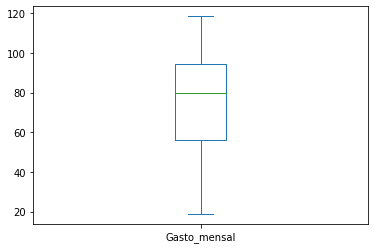

In [57]:
variaveis_quanti.query('Evadiu==1')['Gasto_mensal'].plot.box()


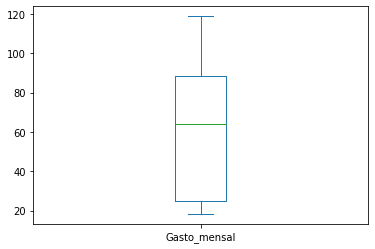

In [58]:
variaveis_quanti.query('Evadiu==0')['Gasto_mensal'].plot.box()

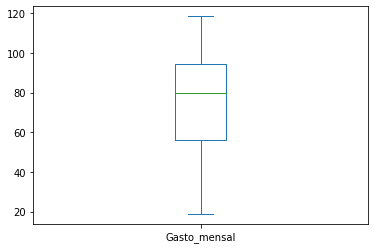

In [59]:
variaveis_quanti.query('Evadiu==1')['Gasto_mensal'].plot.box()

In [60]:
variaveis_quanti.groupby('Evadiu').quantile(0.45)['Gasto_mensal']

Evadiu
0    56.1525
1    76.0800
Name: Gasto_mensal, dtype: float64

In [61]:
variaveis_quanti.groupby('Evadiu').quantile(0.25)['Gasto_mensal']

Evadiu
0    25.05
1    56.15
Name: Gasto_mensal, dtype: float64

Temos que 0 25% quartil do grupo sim é próximo da mediana do grupo que não evadiu. Assim separar os grupos pelo valor do 25% do quartil irá fazer com que 25% dos evasores se torne permanecentes, e 50% dos permanecentes se tornará evasor

In [62]:
lista_01 = []
for item in variaveis_quanti['Gasto_mensal'].values:
  if item >= 56:
    lista_01.append(1)
  else: lista_01.append(0)
lista_01[:5]

[1, 1, 0, 1, 0]

In [63]:
df_modelo['GastoMensal01'] = lista_01
df_modelo

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim,Meses01,GastoMensal01
1597,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1
4287,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1
778,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
1037,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1
2747,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1
7023,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1
7036,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1
7037,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0


In [64]:
x= df_modelo[['Idoso', 'Parceiro', 'Dependencia', 'Fatura_online',
       'Contrato_anual', 'Contrato_mes', 'Contrato_bianual',
       'Pagamento_Cheque_Email', 'Pagamento_Cheque_Eletrico',
       'Pagamento_Cartao_credito', 'Pagamento_Transferencia', 'Internet_DSL',
       'Internet_FibraOptica', 'Internet_SemInternet', 'Tv', 'Filme_sim',
       'Meses01','GastoMensal01']]
x.head()

,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim,Meses01,GastoMensal01
1597,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1
4287,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1
778,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
1037,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1
2747,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0


In [65]:
y = df_modelo['Evadiu']
y.head()

1597    0
4287    0
778     0
1037    0
2747    0
Name: Evadiu, dtype: int64

In [66]:
seed = np.random.seed = 10

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,random_state = seed, stratify = y)
print(treino_x.shape)
print(teste_x.shape)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)*100
print('A acuracia do modelo é de %.2f%%' %acuracia)

from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoesDummy = dummy.predict(teste_x)
acuracia = accuracy_score(teste_y,previsoesDummy)*100
print('A acuracia do Dummy é de %.2f%%' %acuracia)

(2819, 18)
(940, 18)
A acuracia do modelo é de 77.13%
A acuracia do Dummy é de 50.32%


### Gasto Total

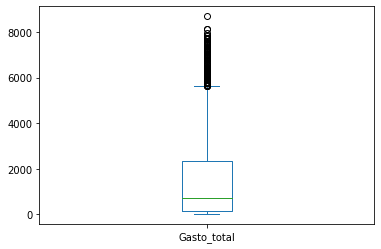

In [67]:
variaveis_quanti.query('Evadiu==1')['Gasto_total'].plot.box()

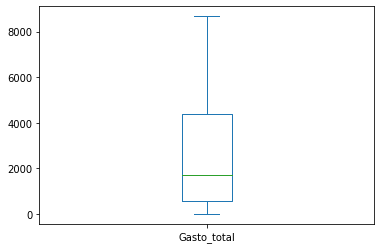

In [68]:
variaveis_quanti.query('Evadiu==0')['Gasto_total'].plot.box()

In [69]:
print(variaveis_quanti.groupby('Evadiu').quantile(0.6)['Gasto_total'])
print(variaveis_quanti.groupby('Evadiu').quantile(0.4)['Gasto_total'])

Evadiu
0    2560.29
1    1128.75
Name: Gasto_total, dtype: float64
Evadiu
0    1185.57
1     371.70
Name: Gasto_total, dtype: float64


In [70]:
lista_01 = []
for item in variaveis_quanti['Gasto_total'].values:
  if item <= 1128:
    lista_01.append(1)
  else: lista_01.append(0)
lista_01[:5]

[0, 0, 0, 0, 0]

In [71]:
df_modelo['GastoTotal01'] = lista_01
df_modelo

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,Pagamento_Cartao_credito,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim,Meses01,GastoMensal01,GastoTotal01
1597,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0
4287,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0
778,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1037,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0
2747,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0
7023,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1
7036,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1
7037,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1


In [72]:
x= df_modelo[['Idoso', 'Parceiro', 'Dependencia', 'Fatura_online',
       'Contrato_anual', 'Contrato_mes', 'Contrato_bianual',
       'Pagamento_Cheque_Email', 'Pagamento_Cheque_Eletrico',
       'Pagamento_Cartao_credito', 'Pagamento_Transferencia', 'Internet_DSL',
       'Internet_FibraOptica', 'Internet_SemInternet', 'Tv', 'Filme_sim',
       'Meses01','GastoMensal01','GastoTotal01']]
y = df_modelo['Evadiu']


In [73]:
seed = np.random.seed = 10

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,random_state = seed, stratify = y)
print(treino_x.shape)
print(teste_x.shape)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)*100
print('A acuracia do modelo é de %.2f%%' %acuracia)

from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoesDummy = dummy.predict(teste_x)
acuracia = accuracy_score(teste_y,previsoesDummy)*100
print('A acuracia do Dummy é de %.2f%%' %acuracia)

(2819, 19)
(940, 19)
A acuracia do modelo é de 77.66%
A acuracia do Dummy é de 50.32%


### Gastos Diários

A variável Gasto Diário foi feita com base no gasto mensal, e na análise descritiva tivemos uma informação de que o gasto diários dos evasores era de 2.5 e dos permanecentes de 2.0.

Vamos usar essa informação e a metade da diferença (2.25) para definir quem evadiu e quem não evadiu


In [74]:
lista_01 = []
for item in variaveis_quanti['Gasto_diario'].values:
  if item >= 2.25:
    lista_01.append(1)
  else: lista_01.append(0)
df_modelo['GastoDiario01'] = lista_01
df_modelo

,Evadiu,Idoso,Parceiro,Dependencia,Fatura_online,Contrato_anual,Contrato_mes,Contrato_bianual,Pagamento_Cheque_Email,Pagamento_Cheque_Eletrico,...,Pagamento_Transferencia,Internet_DSL,Internet_FibraOptica,Internet_SemInternet,Tv,Filme_sim,Meses01,GastoMensal01,GastoTotal01,GastoDiario01
1597,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,1,0,1,0,1
4287,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,1,0,1,0,1
778,0,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1037,0,0,1,1,1,0,0,1,0,1,...,0,1,0,0,1,1,0,1,0,1
2747,0,1,1,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,1,1,0,0,1,0,1,0,0,0,...,1,0,1,0,1,1,0,1,0,1
7023,1,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,1,1,1,1
7036,1,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,1,1,1
7037,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [75]:
x= df_modelo[['Idoso', 'Parceiro', 'Dependencia', 'Fatura_online',
       'Contrato_anual', 'Contrato_mes', 'Contrato_bianual',
       'Pagamento_Cheque_Email', 'Pagamento_Cheque_Eletrico',
       'Pagamento_Cartao_credito', 'Pagamento_Transferencia', 'Internet_DSL',
       'Internet_FibraOptica', 'Internet_SemInternet', 'Tv', 'Filme_sim',
       'Meses01','GastoMensal01','GastoTotal01','GastoDiario01']]
y = df_modelo['Evadiu']

In [76]:
seed = np.random.seed = 10

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,random_state = seed, stratify = y)
print(treino_x.shape)
print(teste_x.shape)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)*100
print('A acuracia do modelo é de %.2f%%' %acuracia)

from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoesDummy = dummy.predict(teste_x)
acuracia = accuracy_score(teste_y,previsoesDummy)*100
print('A acuracia do Dummy é de %.2f%%' %acuracia)

(2819, 20)
(940, 20)
A acuracia do modelo é de 77.77%
A acuracia do Dummy é de 50.32%


### Vamos salvar os dados prontos para este Modelo


In [77]:
df_modelo.to_csv('Dados_Para_Modelo_Classificacao.csv',index = False)

## 3º Modelo: Árvore de Decisão